# ECE 143: Programming for Data Analysis 

## Petfinder.my Adoption Prediction 
*Predicting the adoptability of pets based on different features*

- Initial Analysis
- State-wise Count and HDI (Combining States)
- Average Adoption rate per State
- Recommender System
    
__Inderjot Saggu__

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
import os.path
from os import path
import matplotlib.pyplot as plt
import difflib
from utils_recommender import *

plt.rcParams['figure.figsize'] = (10,6)

In [16]:
# Load data

file_path = "../data/"
train, breed_labels,color_labels, state_labels = load_data(file_path)

In [ ]:
# Initial Look at the Data
initial_analysis(train)

In [17]:
# Creating a copy of data for visualization
train_copy = train.copy()

    StateID        StateName
0     41336            Johor
1     41325            Kedah
2     41367         Kelantan
3     41401     Kuala Lumpur
4     41415           Labuan
5     41324           Melaka
6     41332  Negeri Sembilan
7     41335           Pahang
8     41330            Perak
9     41380           Perlis
10    41327     Pulau Pinang
11    41345            Sabah
12    41342          Sarawak
13    41326         Selangor
14    41361       Terengganu


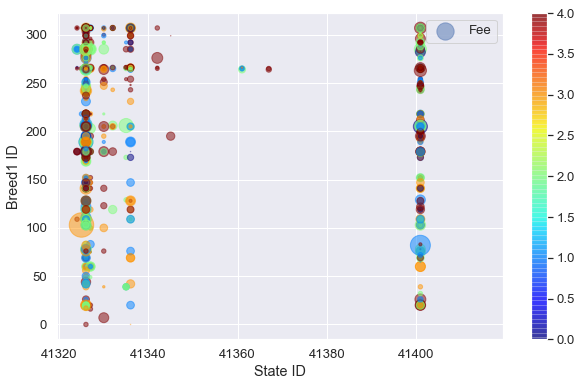

In [18]:
# Data density For each State vs Breed1 
# Area of each point is proportional to Fee
# Color of each point is representative of adoptibility
plt.rcParams['figure.figsize'] = (10,6)

state_dict = dict(zip(state_labels["StateID"], state_labels["StateName"]))

x_axis = [state_dict[i] for i in train_copy["State"]]
x_axis = pd.DataFrame(x_axis)

train_copy["StateName"] = x_axis
print(state_labels)
sc = plt.scatter(train_copy["State"], train_copy["Breed1"], alpha=0.5, 
            s=train_copy["Fee"]/5, label="Fee", c=train_copy["AdoptionSpeed"],
            cmap=plt.get_cmap("jet"))
plt.colorbar(sc)
plt.xlabel("State ID")
plt.ylabel("Breed1 ID")
plt.legend()

## State-HDI Analysis

In [19]:
# Correlating top states with HDI 
state_labels['HDI'] = [0.785, 0.769, 0.741, 0.822, 
                       0.742, 0.794, 0.789, 0.766, 
                       0.778, 0.767, 0.803, 0.674, 
                       .707, 0.819, 0.762]

# Idenify Top States
top_states = train_copy['State'].value_counts()
x = []
y = []
bar_color = []
for state in top_states.index:
    x.append(state_dict[state])
    y.append(top_states[state])
    bar_color.append(state_labels.loc[state_labels['StateID'] == state]['HDI'].values[0])
    print(state_dict[state], state_labels.loc[state_labels['StateID'] == state]['HDI'].values[0])

Selangor 0.819
Kuala Lumpur 0.822
Pulau Pinang 0.803
Johor 0.785
Perak 0.778
Negeri Sembilan 0.789
Melaka 0.794
Kedah 0.769
Pahang 0.766
Terengganu 0.762
Sabah 0.674
Kelantan 0.741
Sarawak 0.707
Labuan 0.742


0.539193190475


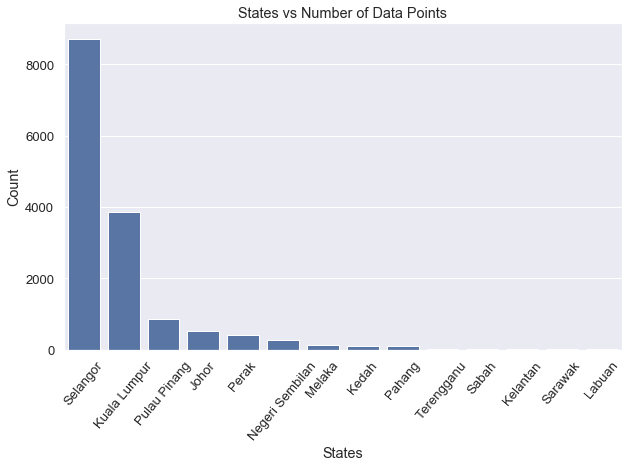

In [20]:
sns.set(font_scale=1.2)

my_plot = sns.barplot(x, y, color = 'b')
for item in my_plot.get_xticklabels():
    item.set_rotation(50)
    
plt.xlabel("States")
plt.ylabel("Count")
plt.title("States vs Number of Data Points")
# Correlation between count and HDI
print(np.corrcoef(y, bar_color)[0,1])

In [21]:
# Combine 
    # Johor 0.785
    # Perak 0.778
    # Negeri Sembilan 0.789
    # Melaka 0.794 as one state

train_copy = train_copy.replace(to_replace = [41336, 41330, 41332], value = 0)

## Average Adoption Speed per State

[2.4520312141381684, 2.5401820546163849, 2.7817319098457887, 2.6499999999999999]


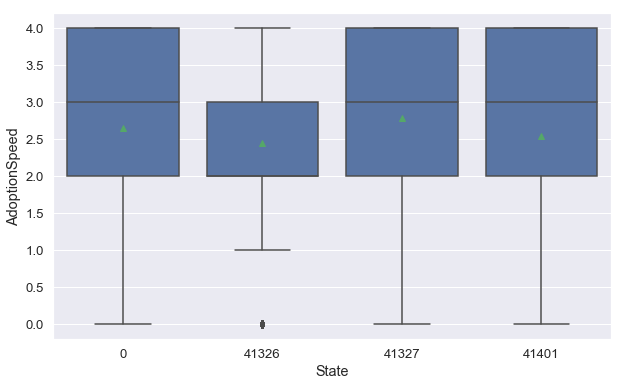

In [22]:
top_state_ID = [41326, 41401, 41327, 0]
top_states_name = ['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Combined_state']
average_adoption_speed = []

train_copy= train_copy.drop(train_copy[(train_copy['State'] != 41326) & (train_copy['State'] != 41401)
                          & (train_copy['State'] != 41327)& (train_copy['State'] != 0)].index)

sns.boxplot(x = train_copy['State'], y=train_copy["AdoptionSpeed"], showmeans=True , color = 'b')

for i in range(len(top_state_ID)):
    average_adoption_speed.append(train_copy.loc[train_copy['State'] == top_state_ID[i]]['AdoptionSpeed'].mean(0))


print(average_adoption_speed)


## Recommender System

In [13]:
breed_dict = dict(zip(breed_labels['BreedName'].values, breed_labels['BreedID'].values))
    
recommender_system(state_dict, breed_dict, train_copy)


Enter State: Kuala Lumpur
Type of Pet: Dog
Breed: Mixed


,Type,Name,Age,Gender,FurLength,Vaccinated,Dewormed,Sterilized,Quantity,Fee,Description,PetID,StateName
1519,1,Sweety,12,2,2,Yes,Yes,Yes,1,0,"Clever, lively",86c412966,Kuala Lumpur
7109,1,Kiki,13,2,1,Yes,Yes,Yes,1,0,Kiki is a good dog. She help you to take care ...,640683dd9,Kuala Lumpur
2725,1,K-1 Jorge,36,1,2,Yes,Yes,Yes,1,0,"Jorge is a stout, strong dog yet soft enough o...",77f9b1470,Kuala Lumpur
4699,1,Save ME Or I'll Die #45,2,3,1,Not Sure,Not Sure,Not Sure,2,0,PLEASE RESCUE/ADOPT ME FROM KLANG POUND OR I W...,ce19e69ff,Kuala Lumpur
11900,1,Big Foot,2,1,1,No,No,No,1,0,Big Foot was rescued together two other siblin...,b02f2fafa,Kuala Lumpur
